Regression Analysis-Using Monthly Returns and Breakeven

In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

commodities_UKInf = pd.read_csv('YoY UK Inflation.csv') 

commodities_UKInf.head()

,Dates,MSCI World Net Total Return Lo,Bloomberg Commodity Index,S&P GSCI Energy Official Close,S&P GSCI Industrial Metals Off,S&P GSCI Precious Metals Offic,S&P GSCI Agriculture Official,S&P GSCI Gold Official Close I,YoY % NSA
0,31/01/1984,0.231385,-0.012549,0.249432,-0.241795,-0.355886,0.004334,-0.334364,0.05
1,29/02/1984,0.170270,0.085571,0.221742,-0.221483,-0.166725,0.030667,-0.143609,0.05
2,30/03/1984,0.171578,0.057066,0.145204,-0.154377,-0.156859,0.004464,-0.152601,0.05
3,30/04/1984,0.106461,0.016991,0.086763,-0.261390,-0.229171,-0.014401,-0.205836,0.05
4,31/05/1984,0.039364,0.037507,0.170134,-0.277395,-0.195817,-0.027102,-0.150262,0.05


In [ ]:
commodities_UKInf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dates                           452 non-null    object 
 1   MSCI World Net Total Return Lo  452 non-null    float64
 2   Bloomberg Commodity Index       452 non-null    float64
 3   S&P GSCI Energy Official Close  452 non-null    float64
 4   S&P GSCI Industrial Metals Off  452 non-null    float64
 5   S&P GSCI Precious Metals Offic  452 non-null    float64
 6   S&P GSCI Agriculture Official   452 non-null    float64
 7   S&P GSCI Gold Official Close I  452 non-null    float64
 8   YoY % NSA                       452 non-null    float64
dtypes: float64(8), object(1)
memory usage: 31.9+ KB


In [ ]:
commodities_UKInf['Dates'] =pd.to_datetime(commodities_UKInf['Dates'])

In [ ]:
commodities_UKInf.columns

Index(['Dates', 'MSCI World Net Total Return Lo', 'Bloomberg Commodity Index',
       'S&P GSCI Energy Official Close', 'S&P GSCI Industrial Metals Off',
       'S&P GSCI Precious Metals Offic', 'S&P GSCI Agriculture Official',
       'S&P GSCI Gold Official Close I', 'YoY % NSA'],
      dtype='object')

In [ ]:
commodities_UKInf.columns = ['Dates', 'MSCI_World', 'Bloomberg_Commodity_Index','Energy', 'Industrial_Metals','Precious_Metals', 'Agriculture','Gold', 'UK_RPI']

In [ ]:
commodities_UKInf.set_index('Dates', inplace= True)

Rolling regression result for MSCI_World as target


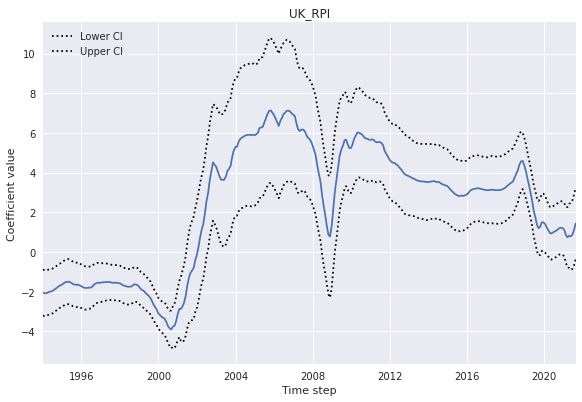

Rolling regression result for Bloomberg_Commodity_Index as target


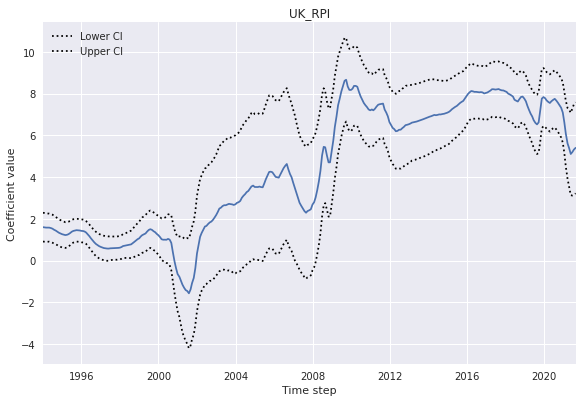

Rolling regression result for Energy as target


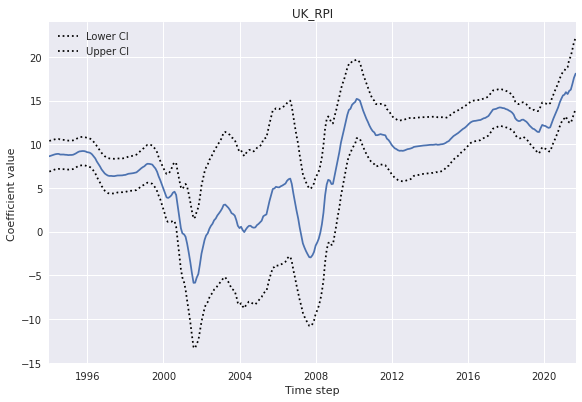

Rolling regression result for Industrial_Metals as target


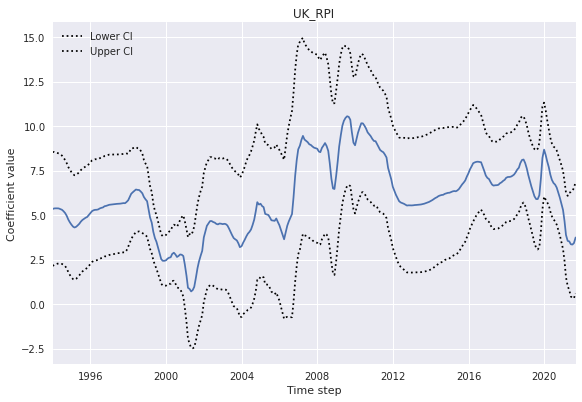

Rolling regression result for Precious_Metals as target


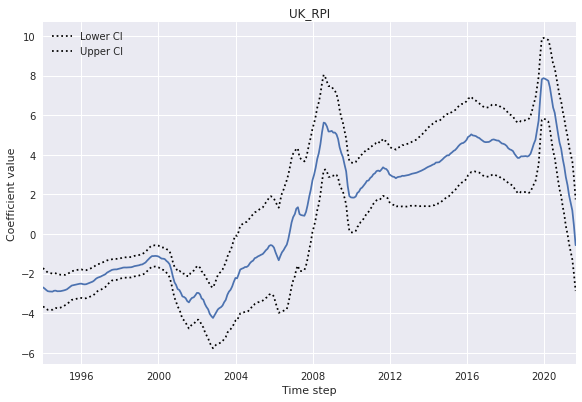

Rolling regression result for Agriculture as target


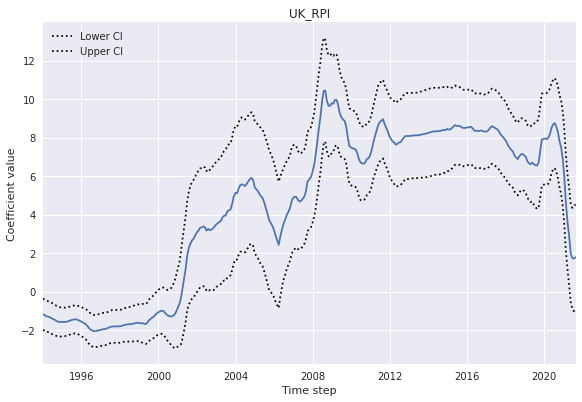

Rolling regression result for Gold as target


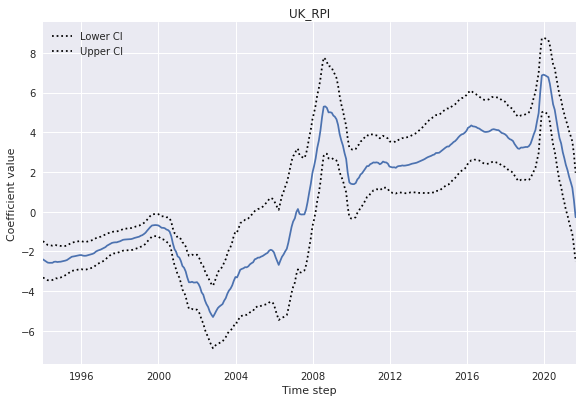

In [ ]:
from statsmodels.regression.rolling import RollingOLS

Sectors = ['MSCI_World', 'Bloomberg_Commodity_Index', 'Energy','Industrial_Metals', 'Precious_Metals', 'Agriculture', 'Gold']


for item in Sectors:
    roll_reg = RollingOLS.from_formula(f'{item} ~ UK_RPI', window=120, data=commodities_UKInf)
    model = roll_reg.fit()
    print(f'Rolling regression result for {item} as target')

    fig = model.plot_recursive_coefficient(variables=['UK_RPI'])
    plt.xlabel('Time step')
    plt.ylabel('Coefficient value')
    plt.show()
   

In [ ]:
commodities_UKInf['UK_RPI'].autocorr(lag=1)

0.9625426769432065

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

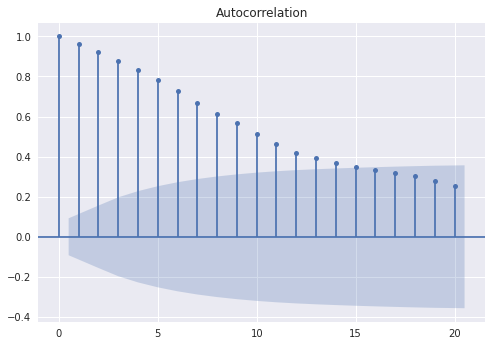

In [ ]:
sm.graphics.tsa.plot_acf(commodities_UKInf['UK_RPI'].dropna(), lags=20)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9fd396c-9c1e-4ca6-8dc8-2011fa1e8fc7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>